### DATASETS MILITARY EXPENDITURE 1960 - 2018

### INTRODUCTION
<ul>
<li>Nama: Abdul Hafidh</li>
<li> NPM: 2008107010056</li>
<li> Kelas: B</li>
</ul>

In [2]:
import numpy as np  # Bertujuan untuk menghitung angka komputasi
import pandas as pd # Salah satunya bertujuan untuk membaca file csv pada kasus ini
from PIL import Image # Mengkonversi gambar ke dalam array
import matplotlib as mpl # Berguna untuk melakukan plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # Berguna untuk memvisualkan waffle chart
import matplotlib.cm as cm
import seaborn as sns # Berguna untuk membuat plot regresi
from wordcloud import WordCloud, STOPWORDS
import urllib
import io


Membaca datasets yang berkaitan dengan pemasukkan dana militer dari tahun 1960 - 2018

In [3]:
sample = pd.read_csv('https://raw.githubusercontent.com/AbdulHafidh-AI/Praktikum-Visualisasi-Data/master/Military%20Expenditure.csv')

### 1. Exploratory Data Analysis

Melihat 5 data teratas

In [4]:
print(sample.head());

          Name Code     Type                      Indicator Name  1960  1961  \
0        Aruba  ABW  Country  Military expenditure (current USD)   NaN   NaN   
1  Afghanistan  AFG  Country  Military expenditure (current USD)   NaN   NaN   
2       Angola  AGO  Country  Military expenditure (current USD)   NaN   NaN   
3      Albania  ALB  Country  Military expenditure (current USD)   NaN   NaN   
4      Andorra  AND  Country  Military expenditure (current USD)   NaN   NaN   

   1962  1963  1964  1965  ...          2009          2010          2011  \
0   NaN   NaN   NaN   NaN  ...           NaN           NaN           NaN   
1   NaN   NaN   NaN   NaN  ...  2.518695e+08  2.981469e+08  3.258070e+08   
2   NaN   NaN   NaN   NaN  ...  3.311193e+09  3.500795e+09  3.639496e+09   
3   NaN   NaN   NaN   NaN  ...  1.827369e+08  1.858932e+08  1.970068e+08   
4   NaN   NaN   NaN   NaN  ...           NaN           NaN           NaN   

           2012          2013          2014          2015     

Melihat 5 data terbawah

In [5]:
print(sample.tail());

             Name Code     Type                      Indicator Name  \
259        Kosovo  XKX  Country  Military expenditure (current USD)   
260   Yemen, Rep.  YEM  Country  Military expenditure (current USD)   
261  South Africa  ZAF  Country  Military expenditure (current USD)   
262        Zambia  ZMB  Country  Military expenditure (current USD)   
263      Zimbabwe  ZWE  Country  Military expenditure (current USD)   

           1960         1961         1962         1963         1964  \
259         NaN          NaN          NaN          NaN          NaN   
260         NaN          NaN          NaN          NaN          NaN   
261  69999972.0  113749954.5  186199925.5  188999924.4  271599891.4   
262         NaN          NaN          NaN          NaN          NaN   
263         NaN          NaN          NaN          NaN          NaN   

            1965  ...          2009          2010          2011          2012  \
259          NaN  ...  2.722709e+07  3.857812e+07  5.096886e+07  

Menghapus semua missing value pada dataset

In [6]:
sample = sample.dropna();
sample

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
11,Australia,AUS,Country,Military expenditure (current USD),4.597601e+08,4.709601e+08,4.894401e+08,5.532801e+08,6.557601e+08,7.873601e+08,...,1.896014e+10,2.321769e+10,2.659720e+10,2.621658e+10,2.482526e+10,2.578371e+10,2.404557e+10,2.638295e+10,2.769111e+10,2.671183e+10
12,Austria,AUT,Country,Military expenditure (current USD),9.155910e+07,9.102985e+07,1.000270e+08,1.259599e+08,1.645947e+08,1.428957e+08,...,3.334755e+09,3.218351e+09,3.409721e+09,3.187227e+09,3.229066e+09,3.305159e+09,2.665410e+09,2.885947e+09,3.138359e+09,3.367460e+09
15,Belgium,BEL,Country,Military expenditure (current USD),3.832202e+08,3.912188e+08,4.222208e+08,4.446013e+08,4.970592e+08,5.007221e+08,...,5.620670e+09,5.244721e+09,5.499371e+09,5.168998e+09,5.263165e+09,5.191509e+09,4.202063e+09,4.314102e+09,4.484653e+09,4.959692e+09
17,Burkina Faso,BFA,Country,Military expenditure (current USD),1.268378e+06,1.643154e+06,4.901761e+06,5.281288e+06,5.358593e+06,3.509330e+06,...,1.273333e+08,1.237005e+08,1.388509e+08,1.477297e+08,1.661363e+08,1.771670e+08,1.479347e+08,1.494674e+08,1.910658e+08,3.124676e+08
27,Brazil,BRA,Country,Military expenditure (current USD),3.827298e+08,3.423397e+08,3.874490e+08,4.419996e+08,3.542279e+08,6.328690e+08,...,2.564881e+10,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,South Asia (IDA & IBRD),TSA,Regions Clubbed Economically,Military expenditure (current USD),9.072639e+08,9.755770e+08,1.281626e+09,2.029027e+09,2.258474e+09,2.580099e+09,...,4.723932e+10,5.577481e+10,6.075238e+10,5.848949e+10,5.919605e+10,6.443596e+10,6.617543e+10,7.213496e+10,8.207734e+10,8.405855e+10
241,Tunisia,TUN,Country,Military expenditure (current USD),1.595238e+07,1.857143e+07,1.428571e+07,1.523810e+07,1.747899e+07,1.276190e+07,...,5.647759e+08,5.711890e+08,7.152396e+08,6.812260e+08,7.593589e+08,9.083573e+08,9.794940e+08,9.877347e+08,8.589496e+08,8.442274e+08
242,Turkey,TUR,Country,Military expenditure (current USD),4.688109e+08,3.013304e+08,3.303769e+08,3.500000e+08,3.808978e+08,4.226770e+08,...,1.635230e+10,1.793937e+10,1.730488e+10,1.795824e+10,1.866257e+10,1.777217e+10,1.588093e+10,1.785398e+10,1.782401e+10,1.896711e+10
249,United States,USA,Country,Military expenditure (current USD),4.538000e+10,4.780800e+10,5.238100e+10,5.229500e+10,5.121300e+10,5.182700e+10,...,6.690000e+11,6.980000e+11,7.110000e+11,6.850000e+11,6.400000e+11,6.100000e+11,5.960000e+11,6.000000e+11,6.060000e+11,6.490000e+11


Melihat Banyak entri pada dataset

In [7]:
print(sample.shape);

(66, 63)


In [8]:
# Menghapus kolom yang tidak diperlukan
sample.drop(['Code','Type','Indicator Name'], axis=1, inplace=True)
# Membuat semua kolom dengan tipe String
sample.columns = list(map(str, sample.columns))
# Mengeset kolom yang berisi Nama Negara menjadi index
sample.set_index('Name', inplace=True)
# Menambah kolom total yang berisi jumlah pengeluaran dana militer dari setiap negara
sample['Total'] = sample.sum(axis=1)
# Membuat list terhadap tahun yang nantinya bisa digunakan untuk mempermudah saat melakukan plotting
years = list(map(str, range(1960, 2019)))

### 2. Filtering

In [9]:
# Mengambil data pada 3 negara
df_abt = sample.loc[['Australia', 'Brazil', 'Turkey'], :] # a --> Australia, b --> Brazil, t --> Turkey disingkat menjadi abt ^_^
# Melihat Dataframe baru ini
df_abt

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Name,,,,,,,,,,,,,,,,,,,,,
Australia,459760073.6,470960075.4,489440078.3,553280088.5,655760104.9,787360126.0,986720157.9,1.197840e+09,1.321600e+09,1.314880e+09,...,2.321769e+10,2.659720e+10,2.621658e+10,2.482526e+10,2.578371e+10,2.404557e+10,2.638295e+10,2.769111e+10,2.671183e+10,5.089079e+11
Brazil,382729752.1,342339720.8,387449035.5,441999606.2,354227857.1,632869026.5,718216574.6,7.461392e+08,7.553076e+08,8.166228e+08,...,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10,5.934356e+11
Turkey,468810916.2,301330376.9,330376940.1,350000000.0,380897803.7,422676991.2,442035398.2,5.084071e+08,5.706858e+08,5.967920e+08,...,1.793937e+10,1.730488e+10,1.795824e+10,1.866257e+10,1.777217e+10,1.588093e+10,1.785398e+10,1.782401e+10,1.896711e+10,4.005090e+11


### 3. Waffle Chart

Tahapan pertama untuk membuat waffle chart adalah menentukan proporis pada setiap kategori sehubungan dengan nilai totalnya. 

In [10]:
# Membuat proporsi pada setiap kategrori sehubungan dengan nilai totalnya
nilai_total = df_abt['Total'].sum()
proporsi_kategori = df_abt['Total'] / nilai_total

# Mencetak nilai proporsi pada setiap kategori
pd.DataFrame({'Proporsi pada setiap kategori': proporsi_kategori})

,Proporsi pada setiap kategori
Name,
Australia,0.338628
Brazil,0.394873
Turkey,0.266499


Tahapan Kedua adalah mendefinisikan keseluruhan ukuran pada waffle chart

In [11]:
# Inisialisasi tinggi dan lebar dari waffle chart
lebar = 40
tinggi = 10

# Menghitung tinggi ubin
tinggi_ubin = tinggi * lebar

print(f'Tinggi ubin: {tinggi_ubin}')


Tinggi ubin: 400


Tahapan ketiga adalah menggunakan proporsi pada setiap kategori untuk menentukan masing-masing bilangan pada ubin

In [12]:
# menghitung jumlah ubin pada setiap kategori
ubin_per_kategori = (proporsi_kategori * tinggi_ubin).round().astype(int)

# Mencetak jumlah ubin pada setiap kategori
pd.DataFrame({'Jumlah ubin': ubin_per_kategori})


,Jumlah ubin
Name,
Australia,135
Brazil,158
Turkey,107


<h5>Perhitungan proporsi pada ketiga negara</h5>
<ul>
<li>Australia akan menempati 135 ubin pada waffle chart</li>
<li>Brazil akan menempati 158 ubin pada waffle chart</li>
<li>Turkey akan menempati 107 ubin pada waffle chart</li>

</ul>

Tahapan keempat adalah membuat sebuah matriks yang menyerupai waffle chart dan mempopulasikanya.

In [13]:
# Inisialisasi sebuah waffle chart sebagai matriks kosong
waffle_chart = np.zeros((tinggi, lebar), dtype = np.uint)

# Mendefinisikan indeks untuk membuat perulangan melalui waffle chart
indeks_kategori = 0
indeks_ubin = 0

# Melakukan perulangan untuk mengisi waffle chart
for kolom in range(lebar):
    for baris in range(tinggi):
        indeks_ubin = indeks_ubin + 1
        
        # Jika indeks ubin melebihi jumlah ubin pada kategori, maka indeks kategori akan bertambah
        if indeks_ubin > sum(ubin_per_kategori[0:indeks_kategori]):
            # Melakukan proses ke kategori selanjutnya
            indeks_kategori = indeks_kategori + 1
        
        # Mengeset nilai class ke tipe data integer, yang dimana nilai class tersebut akan menentukan warna pada waffle chart
        waffle_chart[baris, kolom] = indeks_kategori
        
# Mencetak waffle chart
print('waffle chart populated!')

waffle chart populated!


Melihat bagaimana bentuk matriks pada waffle chart

In [14]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori cocok dengan jumlah ubin yang dialokasikan untuk setiap kategori.

Tahapan kelima adalah membuat map pada waffle chart ke dalam bentuk visual

<Figure size 432x288 with 0 Axes>

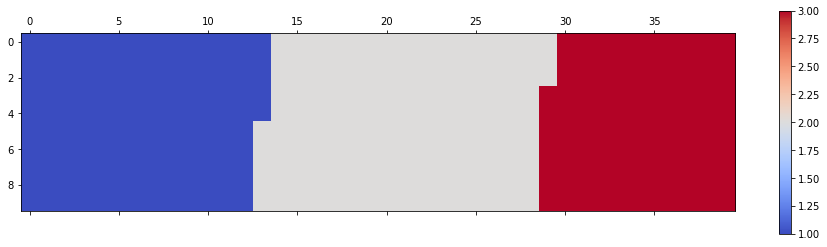

In [15]:
# membuat sebuah gambaran objek baru
fig = plt.figure()

# Menggunakan matshow untuk menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

Tahapan keenam memperhias waffle chart ^_^

<Figure size 432x288 with 0 Axes>

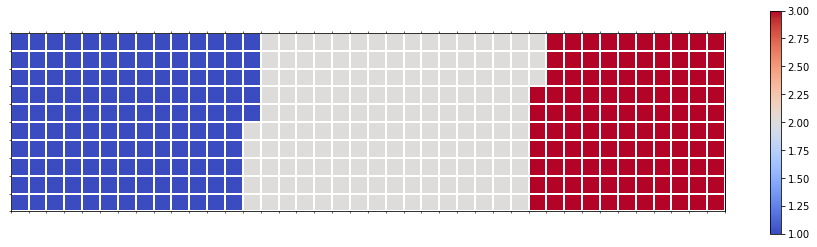

In [16]:
# inisialisasi figure baru
fig = plt.figure()

# Menggunakan matshow untuk menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Mendapatkan nilai axis-nya
ax = plt.gca()

# Mengeset minor ticks
ax.set_xticks(np.arange(-.5, (lebar), 1), minor=True)
ax.set_yticks(np.arange(-.5, (tinggi), 1), minor=True)
    
# Menambah gridlines berdasarkan minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

Tahapan ketujuh membuah plot legend dan menambahkanya ke dalam waffle chart

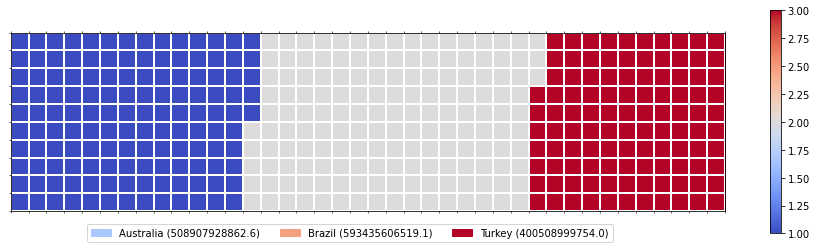

In [17]:
# Menggunakan matshow untuk menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# mendapatkan nilai axis-nya
ax = plt.gca()

# mengeset minor ticks
ax.set_xticks(np.arange(-.5, (lebar), 1), minor=True)
ax.set_yticks(np.arange(-.5, (tinggi), 1), minor=True)
    
# menambhkan gridlines berdasarkan minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# menghitung nilai cumulative pada setiap kategori untuk mencocokan warna antara chart and legend
values_cumsum = np.cumsum(df_abt['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# membuat legend
legend_handles = []
for i, category in enumerate(df_abt.index.values):
    label_str = category + ' (' + str(df_abt['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# menambah legend ke chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_abt.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

### 4. Word Clouds

Pada tahapan ini, kita akan menggunakan analisis yang tinggi untuk memvisualisasikan data yang berbentuk text.

In [18]:
# Membuka file dan membacanya sebagai sebuah variabel dari hunger_games novel
hunger_games_novel = urllib.request.urlopen('https://raw.githubusercontent.com/AbdulHafidh-AI/Praktikum-Visualisasi-Data/master/novel/The%20Hunger%20Games.txt').read().decode('utf-8')

Selanjutnya kita akan menggunakan stopwords yang kita import dari word_cloud. Pada hal ini kita menggunakan fungsi untuk menghilangkan kata-kata yang tidak penting dalam analisis.

In [19]:
stopwords = set(STOPWORDS)

In [20]:
# Inisialisasi sebuah kata dari objek cloud baru
hunger_games_wc = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)

# generate wordCloud
hunger_games_wc.generate(hunger_games_novel)    


Sekarang kita akan memulai untuk memvisualisasi 

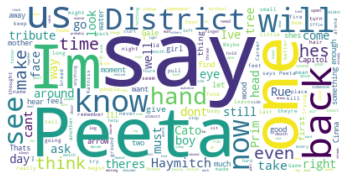

In [21]:
# Menampilkan wordCloud
plt.imshow(hunger_games_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Pada tampilan ini yang kita buat sudah sangat bagus akan tetapi terdapat beberapa kata yang tidak dibutuhkan seperti even yang tidak penting untuk analisis.

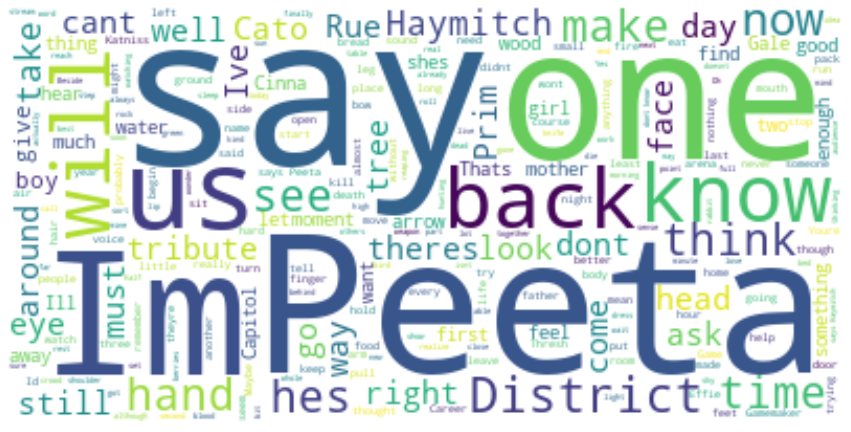

In [22]:
stopwords.add('even') # Menambahkan kata 'even' ke dalam stopwords

# Generate ulang wordCloud
hunger_games_wc.generate(hunger_games_novel)

# Menampilkan wordCloud
fig = plt.figure(figsize=(15,20))

plt.imshow(hunger_games_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
# Peeta mask
peeta_mask = np.array(Image.open(urllib.request.urlopen("https://raw.githubusercontent.com/AbdulHafidh-AI/Praktikum-Visualisasi-Data/master/assets/HunGames.png")))

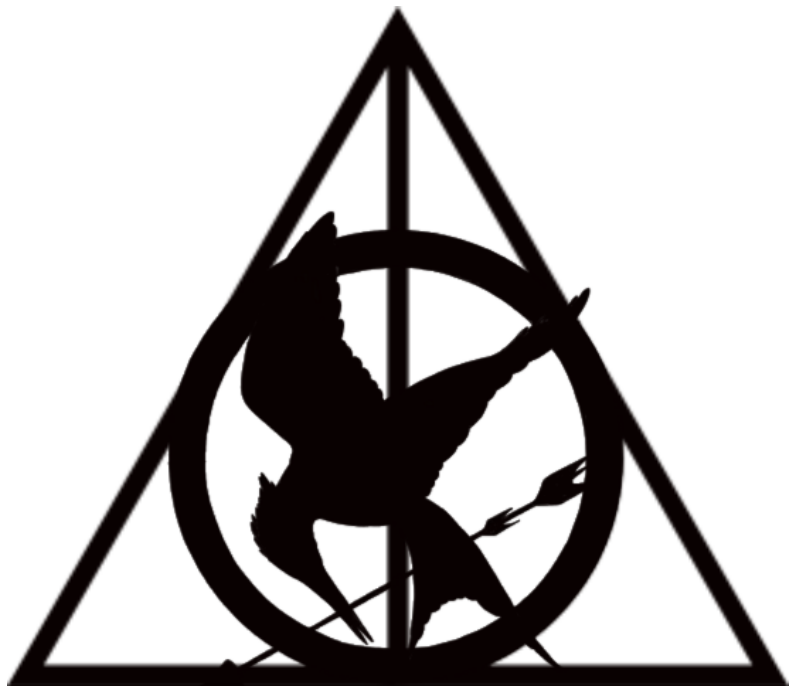

In [36]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(peeta_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

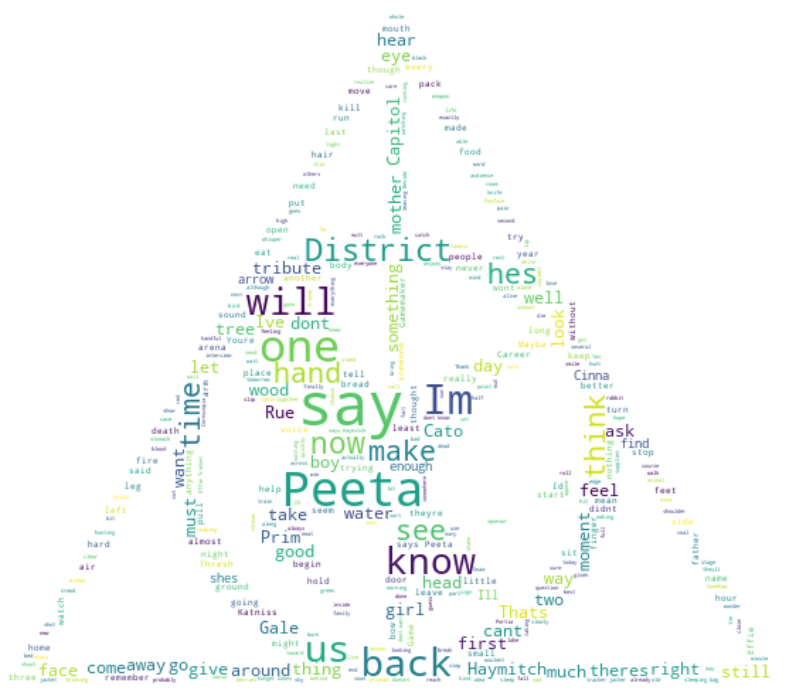

In [37]:
hunger_games_wc = WordCloud(background_color='white',max_words=2000, mask=peeta_mask,stopwords=stopwords)

hunger_games_wc.generate(hunger_games_novel)

fig = plt.figure(figsize=(14, 18))

plt.imshow(hunger_games_wc, interpolation='bilinear')
plt.axis('off')
plt.show()



### 5. Seaborn and Regression Plots

In [26]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(sample[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1960.0,3.532352e+11
1,1961.0,3.731266e+11
2,1962.0,4.153073e+11
3,1963.0,4.304867e+11
4,1964.0,4.347765e+11


<AxesSubplot:xlabel='year', ylabel='total'>

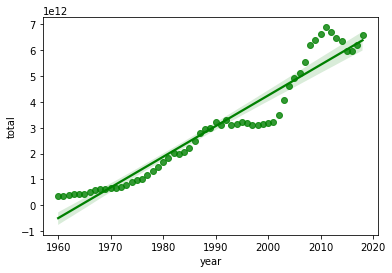

In [27]:
sns.regplot(x='year', y='total', data=df_tot,color='green')